<a href="https://colab.research.google.com/github/senaldm/machine-Learning/blob/main/testCopiedReseachProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This content is a copied one and used only for testing and learning purposes. The original owner's contents of this content can be fount on following link. https://github.com/chashikajw/sinhala-hate-speech-detection

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

dataset_file = '/content/drive/MyDrive/ML/Sinhala_Singlish_Hate_Speech.csv'
data=pd.read_csv(dataset_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
import csv
import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# preporocessing texts
def preporocessingText(sentence):
    #regex for html tags cleaner
    cleaner_htmlTags  = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    cleantext_htmltags = re.sub(cleaner_htmlTags, '',sentence).lower()   #convert to lower case

    #regex for non alphabetical characters cleaner
    cleantext_NonAlp = re.compile(u'[^\u0061-\u007A|^\u0D80-\u0DFF|^\u0030-\u0039]', re.UNICODE)
    #Englosh lower case unicode range = \u0061-\u007A
    #Sinhala unicode range = |u0D80-\u0DFF
    #Numbers unicode range = \u0030-\u0039

    cleantext_finalText = re.sub(cleantext_NonAlp, ' ',cleantext_htmltags).strip(" ")

    #tokenzing
    #finalText = word_tokenize(cleantext_finalText)
    #finalText = sent_token = nltk.sent_tokenize(tokenzie_finalText)

    #return finalText
    return cleantext_finalText

In [ ]:
def isSinglish(sentence):
    try:
        sentence.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True


In [ ]:
# genarate separate dataframes
df_Sinhala  = pd.DataFrame(columns=['PhraseNo', 'Phrase', 'IsHateSpeech'])
df_Singlish = pd.DataFrame(columns=['PhraseNo', 'Phrase', 'IsHateSpeech'])
df_All_preprocess = pd.DataFrame(columns=['PhraseNo', 'Phrase', 'IsHateSpeech'])


singish_index = 1
sinhala_index = 1

for i in range(data.shape[0]):
    dataSentence = data['Phrase'][i]
    preprocessData = preporocessingText(dataSentence)

    if(isSinglish(dataSentence)):
        df_Singlish.loc[singish_index-1] = [singish_index] + [preprocessData] + [data['IsHateSpeech'][i]]
        singish_index += 1

    else:
        df_Sinhala.loc[sinhala_index-1] = [sinhala_index] + [preprocessData] + [data['IsHateSpeech'][i]]
        sinhala_index += 1
    df_All_preprocess.loc[i] = [i+1] + [preprocessData] + [data['IsHateSpeech'][i]]

#df_Sinhala.to_csv('Sinhala_hatespeech.csv')
#df_Singlish.to_csv('Singlish_hatespeech.csv')
#df_All_preprocess.to_csv('AllPreProcess_hatespeech.csv')

In [ ]:
sinhala_sent_percentage = (sinhala_index/data.shape[0])*100
singlish_sent_percentage = (singish_index/data.shape[0])*100
print("Sinhala sentences percentage(mix sinhala and english letters)  = ",str(sinhala_sent_percentage)+" %")
print("Singlish sentences percentage(only has english letters) = ",str(singlish_sent_percentage) +" %")

Sinhala sentences percentage(mix sinhala and english letters)  =  72.48 %
Singlish sentences percentage(only has english letters) =  27.6 %


In [ ]:
def getUniqueTokens(myarr):
    myset = list(set(myarr))
    return myset

def joinWordsIntoSentence(dataframe):
    for itm in range(len(dataframe)):
        words_arr = dataframe['Phrase'][itm]
        dataframe['Phrase'][itm] = ( " ".join( words_arr ))

In [ ]:
#getting the stop words
f_stopWords = io.open("/content/drive/MyDrive/ML/StopWords_425.txt", mode="r", encoding="utf-16")
sinhala_stop_words = []
df_StopWordsRemoval_Sinhala = pd.DataFrame(columns=['PhraseNo', 'Phrase', 'IsHateSpeech'])

for x in f_stopWords:
  sinhala_stop_words.append(x.split()[0])



In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
SinhalaData = df_Sinhala
prev_lengths_arr = []
prev_lengths_arr_unique = []
after_removal_stopWords_lenghts_arr = []
after_removal_stopWords_lenghts_arr_unique = []

for k in range(SinhalaData.shape[0]):
    SentenceTokens = word_tokenize(SinhalaData['Phrase'][k])

    prev_lengths_arr.append(len(SentenceTokens))
    #print(len(SentenceTokens))
    prev_lengths_arr_unique.append(len(getUniqueTokens(SentenceTokens)))
    #remove stop words
    removing_stopwords_sentence = [word for word in SentenceTokens if word not in sinhala_stop_words]
    after_removal_stopWords_lenghts_arr.append(len(removing_stopwords_sentence))
    after_removal_stopWords_lenghts_arr_unique.append(len(getUniqueTokens(removing_stopwords_sentence)))
    #print(removing_stopwords_sentence)
    df_StopWordsRemoval_Sinhala.loc[k] = [k+1] + [removing_stopwords_sentence] + [SinhalaData['IsHateSpeech'][k]]


joinWordsIntoSentence(df_StopWordsRemoval_Sinhala )

<ipython-input-8-7d8504a95fa5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Phrase'][itm] = ( " ".join( words_arr ))


In [ ]:
df_StopWordsRemoval_Sinhala

,PhraseNo,Phrase,IsHateSpeech
0,1,බැල්ලි කොටින්ගේ ගු කනකොට අපහසුවක් දැනුනෙ දන් ඔ...,YES
1,2,මන් ඊයේ මුස්ලිම් ඩෑල් එකක් සෙල්ෆියක් ගත්තා සහජ...,YES
2,3,සංහිදියාවට අවුලක් වෙයි,NO
3,4,කටින් පුරසාරම් දොඩන අපි සිංහලයො විදියට ලැජ්ජා ...,YES
4,5,මචන් මගුල නවත්තලා කොන්දක් තියෙනවානම් පුලුවන්නම...,YES
...,...,...,...
1806,1807,දෙන්නා එකතු වෙලා tv program එකක් කරන්නකො තියන ...,NO
1807,1808,මොනා කිව්වත් ඔයාල දෙන්නගෙ කටවල් දෙකට ගහන්න ලංක...,NO
1808,1809,ඇස්වහ කටවහක් ඔයාලා දෙනාටම හැමදාමත් අපිව සතුටින...,NO
1809,1810,මුන් දෙන්න රෙඩියෝ එකේ සුපිරි ඩබල හිරු ඉන්න කාල...,NO


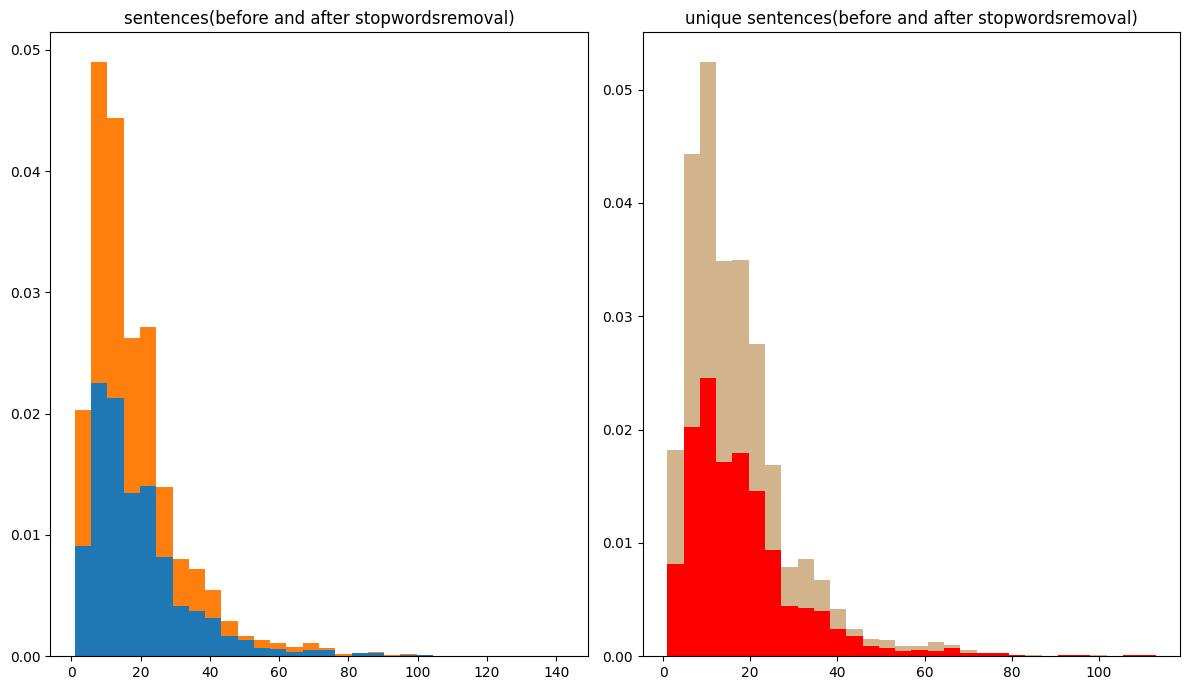

In [ ]:
preLenghts = prev_lengths_arr
afterLenghts = after_removal_stopWords_lenghts_arr
preLenghtsUnique = prev_lengths_arr_unique
afterLenghtsUnique = after_removal_stopWords_lenghts_arr_unique

arr1 = []
arr2 = []
for i in range(len(preLenghts)):
    ar_i = []
    ar_i.append(preLenghts[i])
    ar_i.append(afterLenghts[i])
    arr1.append(ar_i)

    ar_j = []
    ar_j.append(preLenghtsUnique[i])
    ar_j.append(afterLenghtsUnique[i])
    arr2.append(ar_j)

import numpy as np
myarray1 = np.asarray(arr1)
myarray2 = np.asarray(arr2)


import matplotlib.pyplot as plt

np.random.seed(19680801)

n_bins = 30
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 7))
ax0, ax1 = axes.flatten()

colors = ['red', 'tan']


ax0.hist(myarray1, n_bins, density=True, histtype='bar', stacked=True,label=colors)
ax0.set_title('sentences(before and after stopwordsremoval)')

ax1.hist(myarray2, n_bins, density=True, histtype='bar', stacked=True,color=colors, label=colors)
ax1.set_title('unique sentences(before and after stopwordsremoval)')



fig.tight_layout()
plt.show()

In [ ]:
print("Max length(previous) = ",max(prev_lengths_arr))
print("Max length(after removal of stopwords) = ",max(after_removal_stopWords_lenghts_arr))
print()
print("Min length(previous) = ",min(prev_lengths_arr))
print("Min length(after removal of stopwords) = ",min(after_removal_stopWords_lenghts_arr))

Max length(previous) =  142
Max length(after removal of stopwords) =  126

Min length(previous) =  2
Min length(after removal of stopwords) =  1


In [ ]:
f_suffixes = io.open("/content/drive/MyDrive/ML/Suffixes-413.txt", mode="r", encoding="utf-16")
sinhala_suffixes = []
df_Stemming_Sinhala = pd.DataFrame(columns=['PhraseNo', 'Phrase', 'IsHateSpeech'])
afterStemingLenghtsUnique = []

for suf in f_suffixes:
  sinhala_suffixes.append(suf.strip().split()[0])

In [ ]:
def isSuffix(s1, s2):

    n1 = len(s1)
    n2 = len(s2)
    if (n1 > n2):
        return False
    for i in range(n1):
        if(s1[n1 - i - 1] != s2[n2 - i - 1]):
            return False
    return True

def removeSuffix(word,suffix):
    newLen = len(word)-len(suffix)
    wordN = word[0:newLen]
    return wordN

In [ ]:
def stemming(data_frame):
    stems = {}
    found = 0
    df_Stemming = pd.DataFrame(columns=['PhraseNo', 'Phrase', 'IsHateSpeech'])
    for r in range(data_frame.shape[0]):
        Sentence = data_frame['Phrase'][r]
        #print(Sentence)
        SentenceTokens = word_tokenize(Sentence)
        stemming_sentence_n = []
        for wr in SentenceTokens:
            found = 0
            for suf in sinhala_suffixes:
                if(isSuffix(suf.strip(),wr.strip())):
                    stm = removeSuffix(wr.strip(),suf.strip())
                    stems[wr] = stm
                    stemming_sentence_n.append(stems[wr])
                    found = 1
                    break

            if(found == 0):
                stemming_sentence_n.append(wr)

        #print(stemming_sentence_n)
        df_Stemming.loc[r] = [r+1] + [stemming_sentence_n] + [data_frame['IsHateSpeech'][r]]
        stemming_sentence_n = []
        #print(stemming_sentence_n)
    print(stems)
    joinWordsIntoSentence(df_Stemming)
    return df_Stemming


In [ ]:
df_Stemming_Sinhala = stemming(df_StopWordsRemoval_Sinhala)

{'කොටින්ගේ': 'කොටින්', 'ගු': 'ග', 'කනකොට': 'කනකො', 'අපහසුවක්': 'අපහසුවක', 'දැනුනෙ': 'දැනුන', 'දන්': 'දන', 'ඔකිට': 'ඔ', 'මිනිහා': 'මිනිහ', 'මැරුනම': 'මැරුන', 'දැනුන': 'දැනු', 'දුකට': 'දු', 'දහස්': 'දහස', 'ගුනයක': 'ගුනය', 'දුකක්': 'දුකක', 'දැනෙනවා': 'දැනෙ', 'ඉස්සරහට': 'ඉස්සරහ', 'උපසම්පදාව': 'උපසම්පදා', 'තියන': 'තිය', 'භික්සුවක්': 'භික්සුවක', 'හිරේ': 'හිර', 'යැවුවට': 'යැවුව', 'ඔකි': 'ඔ', 'වැඩියෙන්ම': 'වැඩියෙන්', 'ආදරේ': 'ආදර', 'කෙනෙක්': 'කෙනෙක', 'නැති': 'නැ', 'වෙනවා': 'වෙ', 'කල්': 'කල', 'නොගිහින්': 'නොගිහින', 'මන්': 'මන', 'ඊයේ': 'ඊ', 'මුස්ලිම්': 'මුස්ලිම', 'ඩෑල්': 'ඩෑල', 'එකක්': 'එකක', 'සෙල්ෆියක්': 'සෙල්ෆියක', 'ගත්තා': 'ගත්ත', 'සහජීවනේ': 'සහජීවන', 'රැකගෙන': 'රැකගෙ', 'යන්න': 'යන්', 'ඒක': 'ඒ', 'තාම': 'තා', 'දාලා': 'දා', 'පරයා': 'පර', 'සංහිදියාවට': 'සංහිදියාව', 'අවුලක්': 'අවුලක', 'වෙයි': 'වෙ', 'කටින්': 'කටින', 'පුරසාරම්': 'පුරසාරම', 'දොඩන': 'දොඩ', 'සිංහලයො': 'සිංහලය', 'විදියට': 'විදිය', 'ලැජ්ජා': 'ලැජ්ජ', 'විය': 'වි', 'යුතුයි': 'යුතු', 'මචන්': 'මචන', 'මගුල': 'මගු', 'නවත්තලා': 'නවත්ත', 'කොන්ද

<ipython-input-8-7d8504a95fa5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Phrase'][itm] = ( " ".join( words_arr ))


In [ ]:
df_Stemming_Sinhala

,PhraseNo,Phrase,IsHateSpeech
0,1,බැල්ලි කොටින් ග කනකො අපහසුවක දැනුන දන ඔ මිනිහ ...,YES
1,2,මන ඊ මුස්ලිම ඩෑල එකක සෙල්ෆියක ගත්ත සහජීවන රැකග...,YES
2,3,සංහිදියාව අවුලක වෙ,NO
3,4,කටින පුරසාරම දොඩ අපි සිංහලය විදිය ලැජ්ජ වි යුතු,YES
4,5,මචන මගු නවත්ත කොන්දක තියෙනවානම පුලුවන්නම කර පෙ...,YES
...,...,...,...
1806,1807,දෙන් එකත වෙ tv program එකක කරන්නක තිය talent ඒ...,NO
1807,1808,මො කිව්වත ඔයා දෙන්න කටවල දෙ ගහන් ලංකා කටක පට්,NO
1808,1809,ඇස්වහ කටවහක ඔයා දෙනා හැමදාමත අපි සතුටින තියන් ...,NO
1809,1810,මුන දෙන් රෙඩි එ සුපිරි ඩබ හිර ඉන් කාල ඉදන අහ d...,NO


In [ ]:

from sklearn.model_selection import train_test_split

X = df_Stemming_Sinhala["Phrase"]
y = df_Stemming_Sinhala["IsHateSpeech"]
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2, random_state = 0)


In [ ]:
def create_bag_of_words(X):
    from sklearn.feature_extraction.text import CountVectorizer

    print ('Creating bag of words...')
    # Initialize the "CountVectorizer" object

    # In this example features may be single words or two consecutive words
    vectorizer = CountVectorizer()


    train_data_features = vectorizer.fit_transform(X)

    # Convert to a NumPy array for easy of handling
    train_data_features = train_data_features.toarray()

    # Take a look at the words in the vocabulary
    vocab = vectorizer.get_feature_names_out()
    print ('Created')
    return vectorizer, vocab, train_data_features

In [ ]:
vectorizer, vocab, train_data_features  = (
        create_bag_of_words(X_train))

Creating bag of words...
Created


In [ ]:
vocab


array(['00', '000', '000ක', ..., 'ෆය', 'ෆරල', 'ෆල'], dtype=object)

In [ ]:
train_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
def train_logistic_regression(features, label):
    print ("Training model........")
    from sklearn.linear_model import LogisticRegression
    #ml_model = LogisticRegression(C = 100,random_state = 0)
    ml_model = LogisticRegression()
    ml_model.fit(features, label)
    print ('Created')
    return ml_model

In [ ]:
def generateModel(vectorizer,train_data_featres,train_data,test_data):
    ml_modelp = train_logistic_regression(train_data_featres, train_data)

    ml_model_before = ml_modelp
    test_data_featuresp = vectorizer.transform(test_data)
    # Convert to numpy array
    test_data_featuresp = test_data_featuresp.toarray()

    predicted_modl = ml_modelp.predict(test_data_featuresp)

    return ml_model_before,predicted_modl

In [ ]:
ml_model_before_1,predicdedModel_1 = generateModel(vectorizer,train_data_features,y_train,X_test)

Training model........
Created


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np

# Define function to calculate the 4 common mertics
def get_metrics(true_labels, predicted_labels):
    correctly_identified_y = predicted_labels == true_labels

    print("Confusion metrix: ")
    confusion_met = confusion_matrix(true_labels, predicted_labels)
    print(confusion_met)
    print()

    accuracy = np.mean(correctly_identified_y) * 100
    print ('Accuracy = %.0f%%' %accuracy)

    precision = (confusion_met[0][0]/(confusion_met[0][0]+confusion_met[1][0]))* 100
    print ('precision = %.1f%%' %precision)

    recall = (confusion_met[0][0]/(confusion_met[0][0]+confusion_met[0][1]))* 100
    print ('recall = %.1f%%' %recall)

    F1_Score = 2*((precision*recall)/(precision+recall))
    print ('F1 Score = %.1f%%' %F1_Score)

In [ ]:
get_metrics(y_test,predicdedModel_1)

Confusion metrix: 
[[146  39]
 [ 65 113]]

Accuracy = 71%
precision = 69.2%
recall = 78.9%
F1 Score = 73.7%


In [ ]:
SinglishData = df_Singlish

In [ ]:
df_Singlish_unique = pd.DataFrame(columns=['PhraseNo', 'Phrase', 'IsHateSpeech'])
prev_lengths_arr_singlish = []
after_unique_arr_singlish = []

for r in range(SinglishData.shape[0]):
     Sentence_singlish = word_tokenize(SinglishData['Phrase'][r])
     prev_lengths_arr_singlish.append(len(Sentence_singlish))
     unique_sentence = getUniqueTokens(Sentence_singlish)
     df_Singlish_unique.loc[r] = [r+1] + [unique_sentence] + [SinglishData['IsHateSpeech'][r]]

     after_unique_arr_singlish.append(len(unique_sentence))

joinWordsIntoSentence(df_Singlish_unique)

<ipython-input-8-7d8504a95fa5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Phrase'][itm] = ( " ".join( words_arr ))


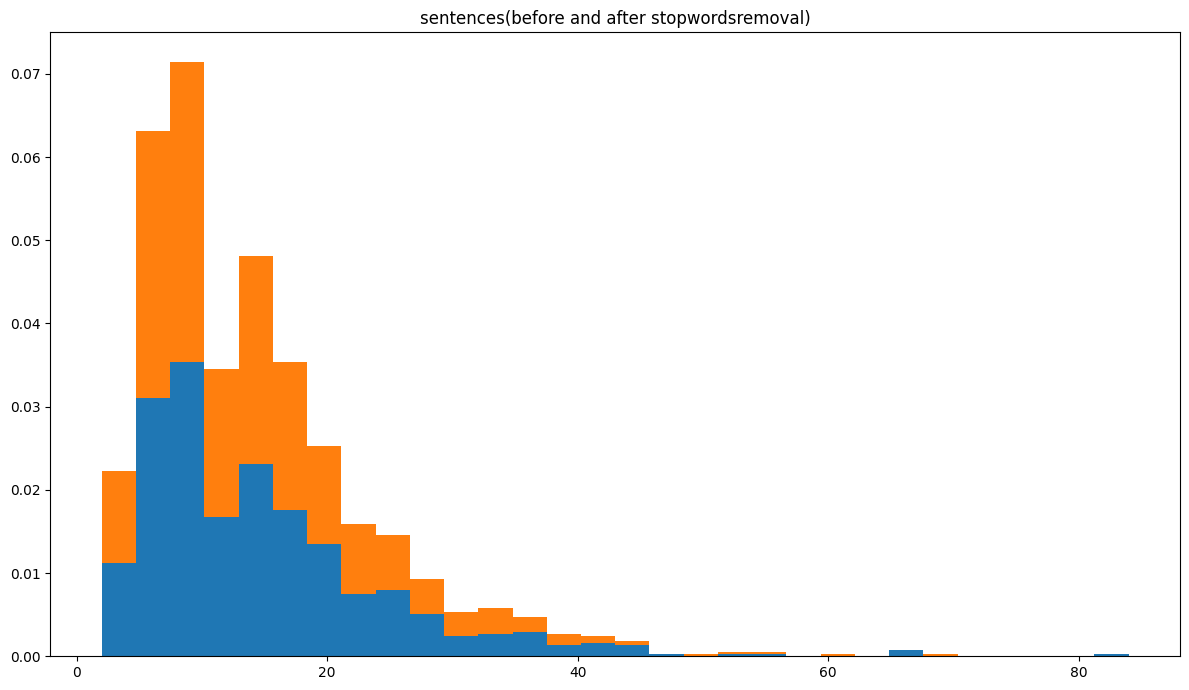

In [ ]:
preLenghts = prev_lengths_arr_singlish
afterLenghts = after_unique_arr_singlish

arr3 = []
for i in range(len(preLenghts)):
    ar_i = []
    ar_i.append(preLenghts[i])
    ar_i.append(afterLenghts[i])
    arr3.append(ar_i)


import numpy as np
myarray3 = np.asarray(arr3)



import matplotlib.pyplot as plt

np.random.seed(19680801)

n_bins = 30
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 7))


labels = ['unique','not unique']

axes.hist(myarray3, n_bins, density=True, histtype='bar', stacked=True,label=labels)
axes.set_title('sentences(before and after stopwordsremoval)')

fig.tight_layout()
plt.show()

In [ ]:
df_Singlish_unique

,PhraseNo,Phrase,IsHateSpeech
0,1,inna manussayo thunema wala karala wenawa tika...,YES
1,2,daruwan bat nethi epa atha thiyena oka nokaran...,YES
2,3,mukuth unta muth witharai na ganan koti sadda ...,YES
3,4,buruwo edapan kanna thiyana songs nikan epa ba...,YES
4,5,akenma karanam set nanna yanawa walata ground ...,YES
...,...,...,...
684,685,kunu witharai nathi harapa kiwwe eka,NO
685,686,balnna tok mawa athal tik karnna subscribe,NO
686,687,me kama tiyena latha mokada kuhaka,NO
687,688,aiyooo appa husmath ape hirawenawa,NO


In [ ]:

X2 = df_Singlish_unique["Phrase"]
y2 = df_Singlish_unique["IsHateSpeech"]
X_train_singlish, X_test_singlish, y_train_singlish, y_test_singlish = train_test_split(
    X2,y2, test_size = 0.2, random_state = 0)

In [ ]:
vectorizer2, vocab2, train_data_features2  = (
        create_bag_of_words(X_train_singlish))

Creating bag of words...
Created


In [ ]:
ml_model_before_2,predicdedModel_2 = generateModel(vectorizer2,train_data_features2,y_train_singlish,X_test_singlish)

Training model........
Created


In [ ]:
get_metrics(y_test_singlish,predicdedModel_2)

Confusion metrix: 
[[69  9]
 [31 29]]

Accuracy = 71%
precision = 69.0%
recall = 88.5%
F1 Score = 77.5%


In [ ]:
def get_important_words(vocab, model):

    model_coeff = pd.DataFrame({'frequency & features': vocab,
                              'model_coefficient': model.coef_.transpose().flatten()})

    # Sort the value
    model_coeff = model_coeff.sort_values('model_coefficient',ascending=False)

    # Top 10 values are the important tokens
    coeff_top = model_coeff.head(10)

    return coeff_top

In [ ]:
get_important_words(vocab, ml_model_before_1)

,frequency & features,model_coefficient
1814,බඩ,2.340855
1717,පක,2.073834
1783,පලයව,1.855033
2100,ලකන,1.757749
1670,නට,1.481538
997,ආතල,1.434201
1143,උඹල,1.398614
2383,හම,1.386183
1449,ජනප,1.309001
1420,ගහපන,1.188151


In [ ]:
get_important_words(vocab2, ml_model_before_2)

,frequency & features,model_coefficient
2437,munta,1.251622
431,badu,1.006828
3914,yako,0.940682
481,balu,0.928272
1256,gon,0.893088
1670,kalakanni,0.889840
2493,nathi,0.736817
2277,me,0.728324
3851,wesiyo,0.709036
1919,kiyanne,0.686786


In [ ]:

df_StopWordsRemoval_All = pd.DataFrame(columns=['PhraseNo', 'Phrase', 'IsHateSpeech'])
pre_len_arr_all = []
AllData = df_All_preprocess

for k in range(AllData.shape[0]):
    SentenceTokens = word_tokenize(AllData['Phrase'][k])

    pre_len_arr_all.append(len(SentenceTokens))

    #remove stop words
    removing_stopwords_sentence_all = [word for word in SentenceTokens if word not in sinhala_stop_words]

    #print(removing_stopwords_sentence)
    df_StopWordsRemoval_All.loc[k] = [k+1] + [removing_stopwords_sentence_all] + [AllData['IsHateSpeech'][k]]

joinWordsIntoSentence(df_StopWordsRemoval_All)  # dont run this code twise.

<ipython-input-8-7d8504a95fa5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Phrase'][itm] = ( " ".join( words_arr ))


In [ ]:

df_StopWordsRemoval_All

,PhraseNo,Phrase,IsHateSpeech
0,1,බැල්ලි කොටින්ගේ ගු කනකොට අපහසුවක් දැනුනෙ දන් ඔ...,YES
1,2,මන් ඊයේ මුස්ලිම් ඩෑල් එකක් සෙල්ෆියක් ගත්තා සහජ...,YES
2,3,සංහිදියාවට අවුලක් වෙයි,NO
3,4,කටින් පුරසාරම් දොඩන අපි සිංහලයො විදියට ලැජ්ජා ...,YES
4,5,මචන් මගුල නවත්තලා කොන්දක් තියෙනවානම් පුලුවන්නම...,YES
...,...,...,...
2495,2496,දෙන්නා එකතු වෙලා tv program එකක් කරන්නකො තියන ...,NO
2496,2497,මොනා කිව්වත් ඔයාල දෙන්නගෙ කටවල් දෙකට ගහන්න ලංක...,NO
2497,2498,ඇස්වහ කටවහක් ඔයාලා දෙනාටම හැමදාමත් අපිව සතුටින...,NO
2498,2499,මුන් දෙන්න රෙඩියෝ එකේ සුපිරි ඩබල හිරු ඉන්න කාල...,NO


In [ ]:
df_Stemming_All = stemming(df_StopWordsRemoval_All)

{'කොටින්ගේ': 'කොටින්', 'ගු': 'ග', 'කනකොට': 'කනකො', 'අපහසුවක්': 'අපහසුවක', 'දැනුනෙ': 'දැනුන', 'දන්': 'දන', 'ඔකිට': 'ඔ', 'මිනිහා': 'මිනිහ', 'මැරුනම': 'මැරුන', 'දැනුන': 'දැනු', 'දුකට': 'දු', 'දහස්': 'දහස', 'ගුනයක': 'ගුනය', 'දුකක්': 'දුකක', 'දැනෙනවා': 'දැනෙ', 'ඉස්සරහට': 'ඉස්සරහ', 'උපසම්පදාව': 'උපසම්පදා', 'තියන': 'තිය', 'භික්සුවක්': 'භික්සුවක', 'හිරේ': 'හිර', 'යැවුවට': 'යැවුව', 'ඔකි': 'ඔ', 'වැඩියෙන්ම': 'වැඩියෙන්', 'ආදරේ': 'ආදර', 'කෙනෙක්': 'කෙනෙක', 'නැති': 'නැ', 'වෙනවා': 'වෙ', 'කල්': 'කල', 'නොගිහින්': 'නොගිහින', 'මන්': 'මන', 'ඊයේ': 'ඊ', 'මුස්ලිම්': 'මුස්ලිම', 'ඩෑල්': 'ඩෑල', 'එකක්': 'එකක', 'සෙල්ෆියක්': 'සෙල්ෆියක', 'ගත්තා': 'ගත්ත', 'සහජීවනේ': 'සහජීවන', 'රැකගෙන': 'රැකගෙ', 'යන්න': 'යන්', 'ඒක': 'ඒ', 'තාම': 'තා', 'දාලා': 'දා', 'පරයා': 'පර', 'සංහිදියාවට': 'සංහිදියාව', 'අවුලක්': 'අවුලක', 'වෙයි': 'වෙ', 'කටින්': 'කටින', 'පුරසාරම්': 'පුරසාරම', 'දොඩන': 'දොඩ', 'සිංහලයො': 'සිංහලය', 'විදියට': 'විදිය', 'ලැජ්ජා': 'ලැජ්ජ', 'විය': 'වි', 'යුතුයි': 'යුතු', 'මචන්': 'මචන', 'මගුල': 'මගු', 'නවත්තලා': 'නවත්ත', 'කොන්ද

<ipython-input-8-7d8504a95fa5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Phrase'][itm] = ( " ".join( words_arr ))


In [ ]:
X_all = df_Stemming_All["Phrase"]
y_all = df_Stemming_All["IsHateSpeech"]
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all,y_all, test_size = 0.2, random_state = 0)

In [ ]:
vectorizer_all, vocab_all, train_data_features_all  = (
        create_bag_of_words(X_train_all))

Creating bag of words...
Created


In [ ]:
ml_model_before_3,predicdedModel_3 = generateModel(vectorizer_all,train_data_features_all,y_train_all,X_test_all)

Training model........
Created


In [ ]:
get_metrics(y_test_all,predicdedModel_3)

Confusion metrix: 
[[228  48]
 [ 90 134]]

Accuracy = 72%
precision = 71.7%
recall = 82.6%
F1 Score = 76.8%


In [ ]:
get_metrics(y_test,predicdedModel_1)

Confusion metrix: 
[[146  39]
 [ 65 113]]

Accuracy = 71%
precision = 69.2%
recall = 78.9%
F1 Score = 73.7%


In [ ]:
get_metrics(y_test_singlish,predicdedModel_2)

Confusion metrix: 
[[69  9]
 [31 29]]

Accuracy = 71%
precision = 69.0%
recall = 88.5%
F1 Score = 77.5%


In [ ]:
get_metrics(y_test_all,predicdedModel_3)

Confusion metrix: 
[[228  48]
 [ 90 134]]

Accuracy = 72%
precision = 71.7%
recall = 82.6%
F1 Score = 76.8%


In [ ]:
def create_bag_of_words_new(X):
    from sklearn.feature_extraction.text import CountVectorizer

    print ('Creating bag of words...')

    # In this example features may be single words or two consecutive words
    vectorizer = CountVectorizer()

    train_data_features = vectorizer.fit_transform(X)

    # Convert to a NumPy array for easy of handling
    train_data_features = train_data_features.toarray()

    # tfidf transform
    from sklearn.feature_extraction.text import TfidfTransformer
    tfidf = TfidfTransformer()
    tfidf_features = tfidf.fit_transform(train_data_features).toarray()

    # Take a look at the words in the vocabulary
    vocab = vectorizer.get_feature_names_out()

    return vectorizer, vocab, train_data_features, tfidf_features, tfidf

In [ ]:
def generateModelTFID(vectorizer,tfidf_features,tfidf,y_train_data,Xtest_data):
    ml_modelp = train_logistic_regression(tfidf_features, y_train_data)
    ml_model_before = ml_modelp
    test_data_featuresp = vectorizer.transform(Xtest_data)
    # Convert to numpy array
    test_data_featuresp = test_data_featuresp.toarray()

    test_data_tfidf_features = tfidf.fit_transform(test_data_featuresp)
    # Convert to numpy array
    test_data_tfidf_features = test_data_tfidf_features.toarray()

    predicted_modl = ml_modelp.predict(test_data_tfidf_features)

    return ml_model_before,predicted_modl

In [ ]:
vectorizer_all_new, vocab_all_new, train_data_features_all_new, tfidf_features_all_new, tfidf_all_new  = (
        create_bag_of_words_new(X_train_all))

Creating bag of words...


In [ ]:
ml_model_before_3_tfid,predicdedModel_3_tfid = generateModelTFID(vectorizer_all_new,tfidf_features_all_new,tfidf_all_new,y_train_all,X_test_all)

Training model........
Created


In [ ]:
ml_model_before_3_tfid,predicdedModel_3_tfid = generateModelTFID(vectorizer_all_new,tfidf_features_all_new,tfidf_all_new,y_train_all,X_test_all)

Training model........
Created


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [ ]:
vectorizer = CountVectorizer()

vect_data = vectorizer.fit_transform(X_all)

In [ ]:
cv_results = cross_validate(ml_model_before_3_tfid, vect_data,y_all, cv=10)

In [ ]:
cv_results['test_score']

array([0.604, 0.64 , 0.6  , 0.604, 0.712, 0.708, 0.716, 0.684, 0.764,
       0.664])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results['test_score'].mean(), cv_results['test_score'].std() / 2))

Accuracy: 0.67 (+/- 0.03)


In [ ]:
def create_bag_of_words_new_ngram_tfid(X):
    from sklearn.feature_extraction.text import CountVectorizer

    print ('Creating bag of words...')
    # Initialize the "CountVectorizer" object


    # In this example features may be single words or two consecutive words
    vectorizer = CountVectorizer(analyzer = "word",   \
                                 tokenizer = None,    \
                                 preprocessor = None, \
                                 stop_words = None,   \
                                 ngram_range = (1,2), \
                                 max_features = 10000)



    # fit_transform() does two functions: First, it fits the model
    # and learns the vocabulary; second, it transforms our training data
    # into feature vectors. The input to fit_transform should be a list of
    # strings. The output is a sparse array
    train_data_features = vectorizer.fit_transform(X)

    # Convert to a NumPy array for easy of handling
    train_data_features = train_data_features.toarray()

    # tfidf transform
    from sklearn.feature_extraction.text import TfidfTransformer
    tfidf = TfidfTransformer()
    tfidf_features = tfidf.fit_transform(train_data_features).toarray()

    # Take a look at the words in the vocabulary
    vocab = vectorizer.get_feature_names_out()

    return vectorizer, vocab, train_data_features, tfidf_features, tfidf

In [ ]:
vectorizer_all_new_ngram, vocab_all_new_ngram, train_data_features_all_new_ngram, tfidf_features_all_new_ngram, tfidf_all_new_ngram  = (
        create_bag_of_words_new_ngram_tfid(X_train_all))

Creating bag of words...


In [ ]:
ml_model_before_3_tfid_ngram,predicdedModel_3_tfid_ngram = generateModelTFID(vectorizer_all_new_ngram,tfidf_features_all_new_ngram,tfidf_all_new_ngram,y_train_all,X_test_all)

Training model........
Created


In [ ]:
get_metrics(y_test_all,predicdedModel_3_tfid_ngram)

Confusion metrix: 
[[239  37]
 [ 90 134]]

Accuracy = 75%
precision = 72.6%
recall = 86.6%
F1 Score = 79.0%
